In [ ]:
import torch
import torch.nn
import torch.nn.functional as nn
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable

import datasets
from utils import *

torch.cuda.set_device(0)

MNIST Dataset

In [ ]:
trn_dset, tst_dset = datasets.get_mnist_dataset(trn_size=60000, tst_size=10000)
trn_loader, tst_loader = datasets.get_cifar_loader(trn_dset, tst_dset, batch_size=128)
inputs,targets = next(iter(trn_loader))
inputs.size()

In [ ]:
utils.plot_batch(inputs[:32])
print("Train:", len(trn_loader.dataset), "Test:", len(tst_loader.dataset), 
      "Input:", inputs.size(), "Target:", targets.size())

In [ ]:
mnist = trn_loader.dataset
mb_size = trn_loader.batch_size #minibatch size
z_dim = 10
X_dim = 28*28
label = targets
h_dim = 128
cnt = 0
lr = 1e-4

In [ ]:
# generative wasserstein GAN model
G = torch.nn.Sequential(
    torch.nn.Linear(z_dim, h_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(h_dim, X_dim),
    torch.nn.Sigmoid()
).cuda()

In [ ]:
# discriminator neural net
D = torch.nn.Sequential(
    torch.nn.Linear(X_dim, h_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(h_dim, 1),
).cuda()


In [ ]:
def reset_grad():
    G.zero_grad()
    D.zero_grad()

In [ ]:
G_solver = optim.RMSprop(G.parameters(), lr=lr) #generator optimizer
D_solver = optim.RMSprop(D.parameters(), lr=lr) #discriminator optimizer

epoch 0
Iter-0; D_loss: -0.002873045392334461; G_loss: -0.008152326568961143


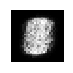

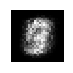

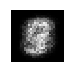

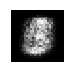

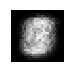

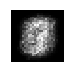

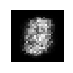

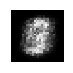

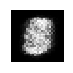

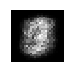

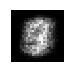

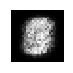

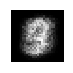

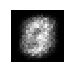

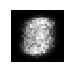

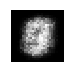

Iter-100; D_loss: -0.0052815452218055725; G_loss: 0.047947339713573456


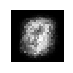

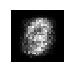

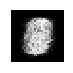

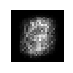

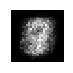

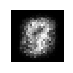

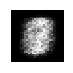

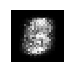

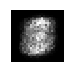

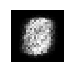

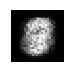

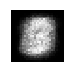

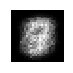

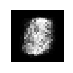

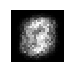

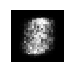

Iter-100; D_loss: -0.0009034592658281326; G_loss: 0.014108140952885151


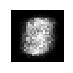

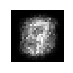

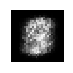

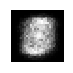

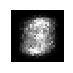

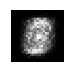

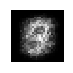

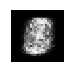

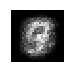

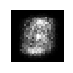

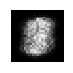

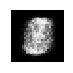

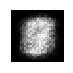

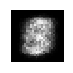

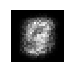

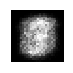

Iter-100; D_loss: -0.0029710568487644196; G_loss: -0.06751834601163864


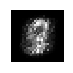

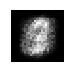

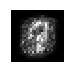

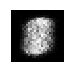

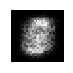

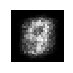

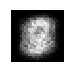

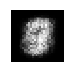

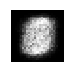

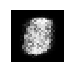

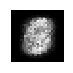

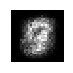

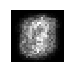

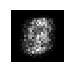

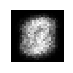

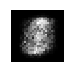

Iter-100; D_loss: -0.001980576664209366; G_loss: -0.039334699511528015


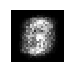

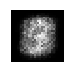

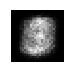

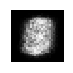

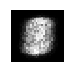

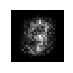

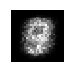

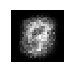

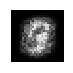

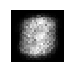

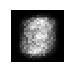

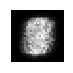

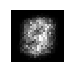

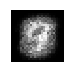

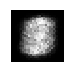

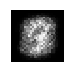

Iter-100; D_loss: -0.0017205402255058289; G_loss: 0.05551248416304588


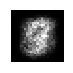

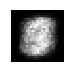

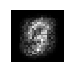

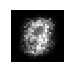

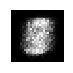

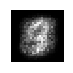

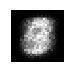

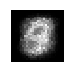

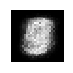

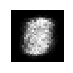

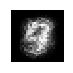

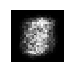

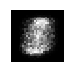

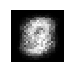

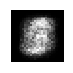

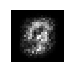

epoch 1
Iter-100; D_loss: -0.001438051462173462; G_loss: 0.032790303230285645


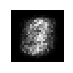

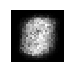

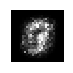

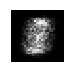

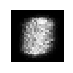

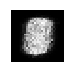

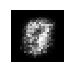

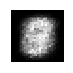

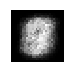

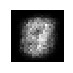

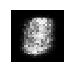

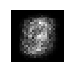

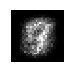

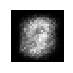

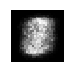

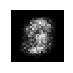

Iter-100; D_loss: -0.0017934823408722878; G_loss: -0.0071212779730558395


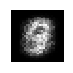

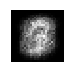

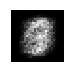

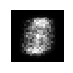

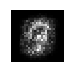

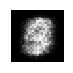

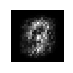

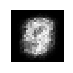

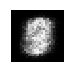

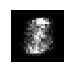

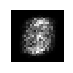

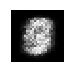

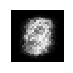

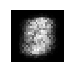

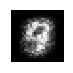

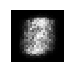

Iter-100; D_loss: -0.002069337060675025; G_loss: 0.005903585813939571


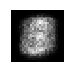

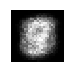

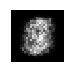

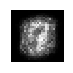

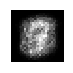

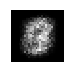

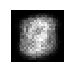

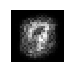

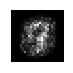

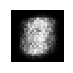

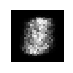

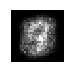

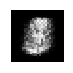

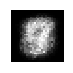

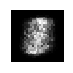

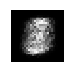

Iter-100; D_loss: -0.0030589131638407707; G_loss: -0.007758562918752432


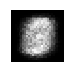

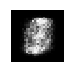

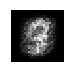

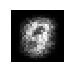

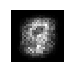

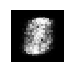

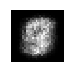

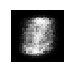

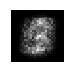

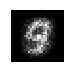

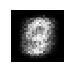

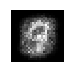

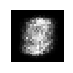

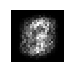

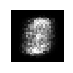

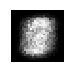

Iter-100; D_loss: -0.0013005062937736511; G_loss: -0.08264277130365372


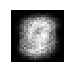

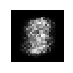

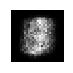

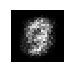

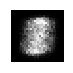

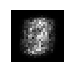

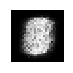

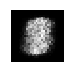

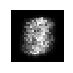

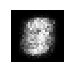

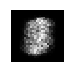

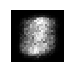

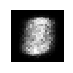

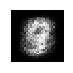

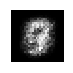

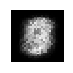

Iter-100; D_loss: -0.0017996523529291153; G_loss: -0.014712879434227943


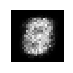

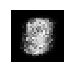

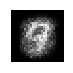

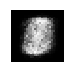

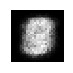

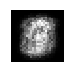

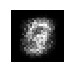

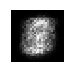

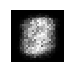

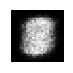

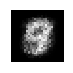

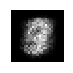

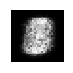

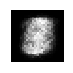

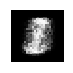

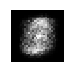

epoch 2
Iter-100; D_loss: -0.003411560785025358; G_loss: 0.009702776558697224


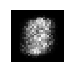

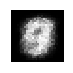

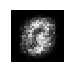

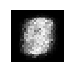

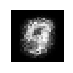

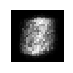

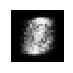

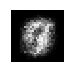

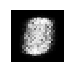

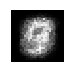

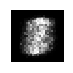

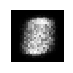

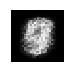

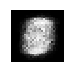

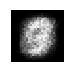

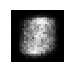

Iter-100; D_loss: -0.0019176416099071503; G_loss: -0.02211032062768936


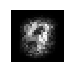

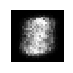

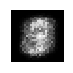

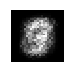

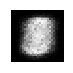

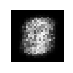

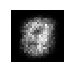

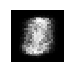

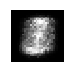

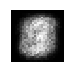

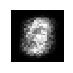

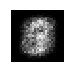

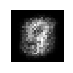

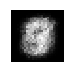

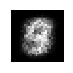

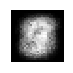

Iter-100; D_loss: -0.0023086676374077797; G_loss: -0.012180889956653118


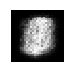

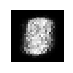

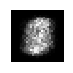

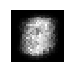

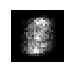

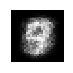

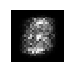

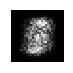

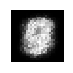

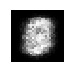

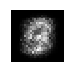

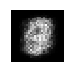

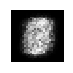

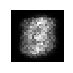

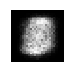

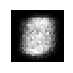

Iter-100; D_loss: -0.0013118172064423561; G_loss: 0.006154301576316357


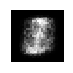

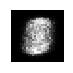

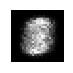

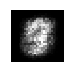

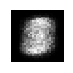

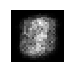

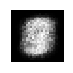

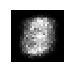

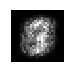

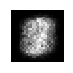

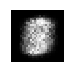

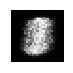

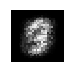

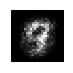

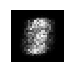

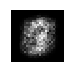

Iter-100; D_loss: -0.002887217327952385; G_loss: 0.009625077247619629


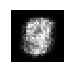

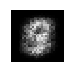

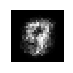

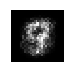

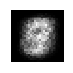

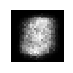

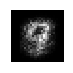

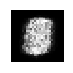

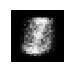

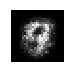

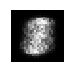

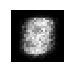

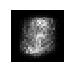

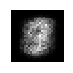

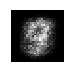

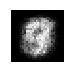

epoch 3
Iter-100; D_loss: -0.002053838223218918; G_loss: -0.016416069120168686


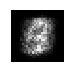

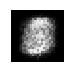

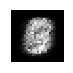

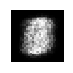

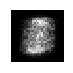

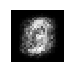

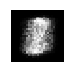

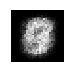

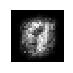

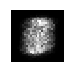

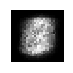

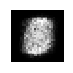

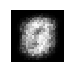

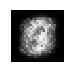

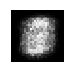

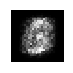

Iter-100; D_loss: -0.0025576818734407425; G_loss: -0.022140678018331528


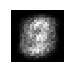

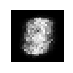

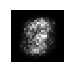

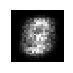

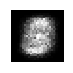

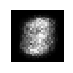

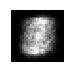

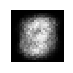

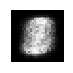

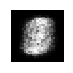

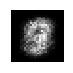

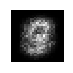

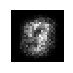

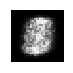

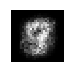

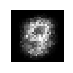

Iter-100; D_loss: -0.0026086182333528996; G_loss: 0.005383353680372238


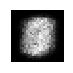

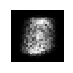

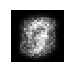

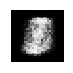

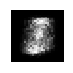

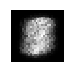

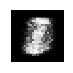

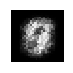

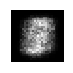

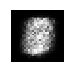

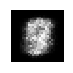

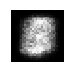

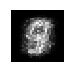

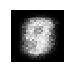

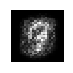

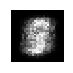

Iter-100; D_loss: -0.0007813423871994019; G_loss: 0.07426588982343674


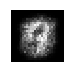

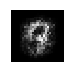

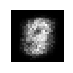

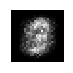

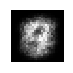

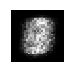

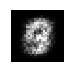

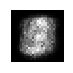

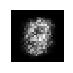

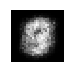

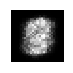

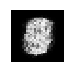

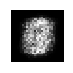

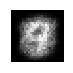

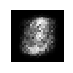

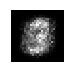

Iter-100; D_loss: 0.0022794902324676514; G_loss: 0.06650182604789734


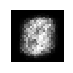

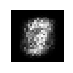

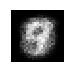

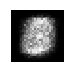

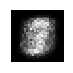

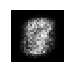

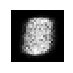

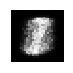

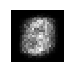

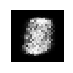

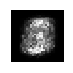

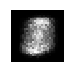

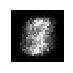

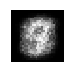

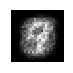

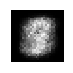

Iter-100; D_loss: -0.0025266259908676147; G_loss: 0.024521535262465477


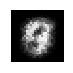

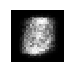

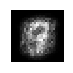

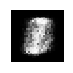

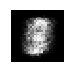

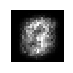

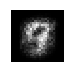

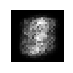

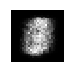

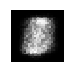

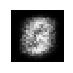

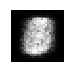

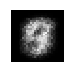

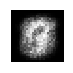

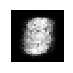

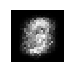

epoch 4
Iter-100; D_loss: -0.0006843917071819305; G_loss: 0.010998171754181385


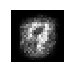

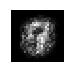

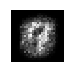

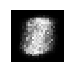

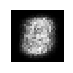

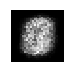

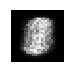

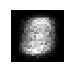

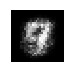

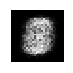

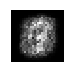

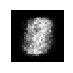

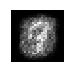

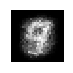

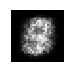

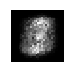

Iter-100; D_loss: -0.0018428433686494827; G_loss: -0.02669713646173477


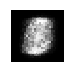

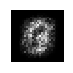

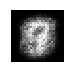

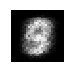

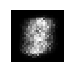

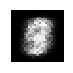

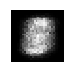

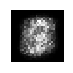

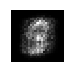

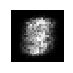

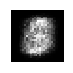

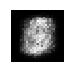

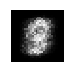

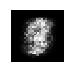

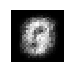

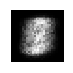

Iter-100; D_loss: -0.0003468431532382965; G_loss: -0.040020085871219635


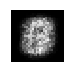

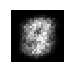

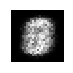

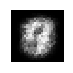

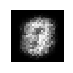

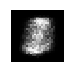

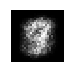

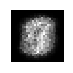

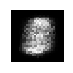

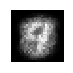

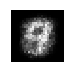

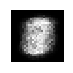

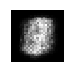

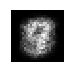

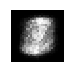

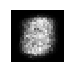

Iter-100; D_loss: -0.0014316178858280182; G_loss: -0.04454895481467247


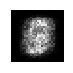

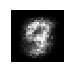

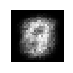

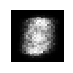

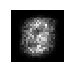

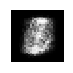

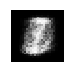

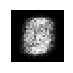

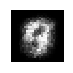

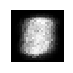

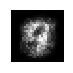

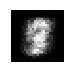

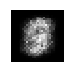

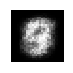

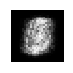

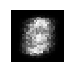

Iter-100; D_loss: -0.0026168676558882; G_loss: 0.005754245910793543


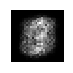

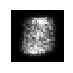

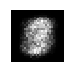

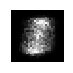

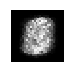

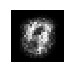

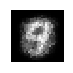

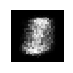

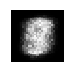

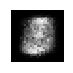

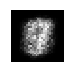

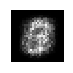

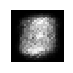

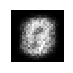

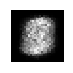

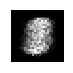

epoch 5
Iter-100; D_loss: -0.0025930460542440414; G_loss: -0.020411916077136993


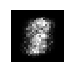

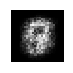

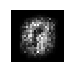

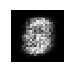

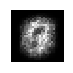

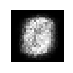

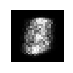

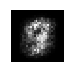

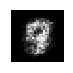

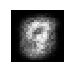

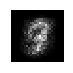

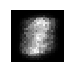

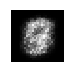

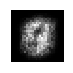

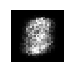

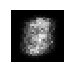

Iter-100; D_loss: -0.001425938680768013; G_loss: -0.02107069455087185


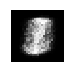

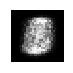

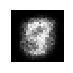

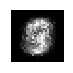

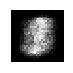

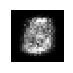

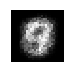

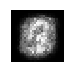

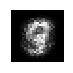

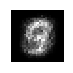

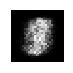

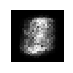

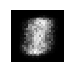

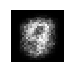

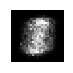

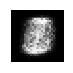

Iter-100; D_loss: -0.0018462017178535461; G_loss: 0.021132521331310272


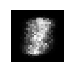

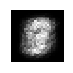

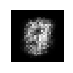

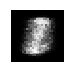

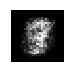

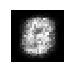

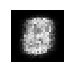

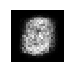

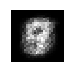

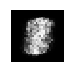

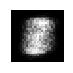

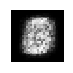

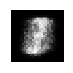

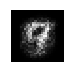

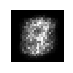

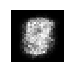

Iter-100; D_loss: -0.003959601745009422; G_loss: -0.022490352392196655


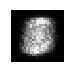

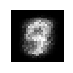

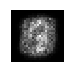

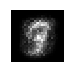

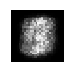

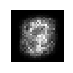

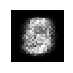

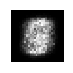

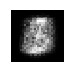

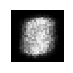

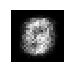

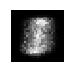

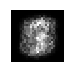

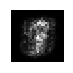

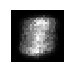

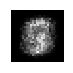

Iter-100; D_loss: -0.008828401565551758; G_loss: -0.06289348751306534


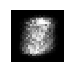

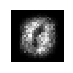

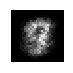

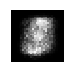

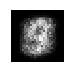

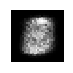

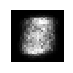

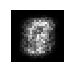

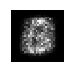

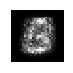

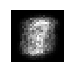

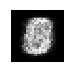

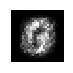

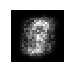

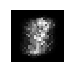

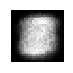

Iter-100; D_loss: -0.0046071577817201614; G_loss: -0.018824242055416107


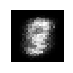

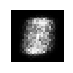

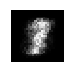

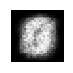

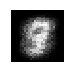

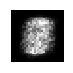

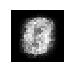

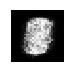

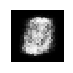

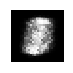

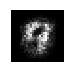

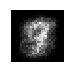

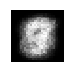

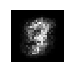

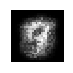

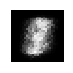

epoch 6
Iter-100; D_loss: -0.00404460821300745; G_loss: -0.011969824321568012


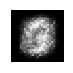

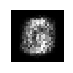

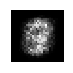

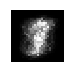

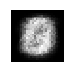

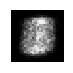

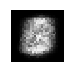

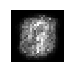

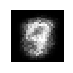

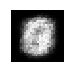

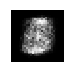

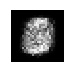

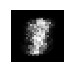

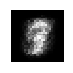

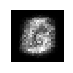

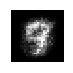

Iter-100; D_loss: -0.004880282562226057; G_loss: 0.0036304995883256197


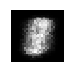

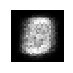

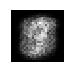

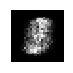

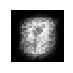

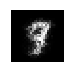

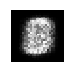

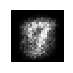

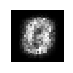

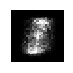

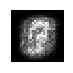

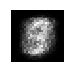

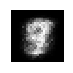

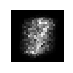

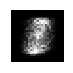

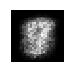

Iter-100; D_loss: -0.006817720830440521; G_loss: -0.0002744521771091968


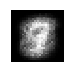

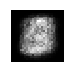

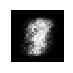

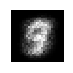

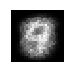

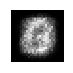

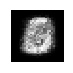

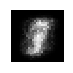

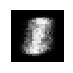

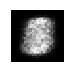

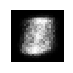

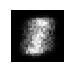

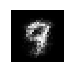

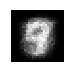

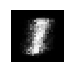

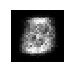

Iter-100; D_loss: -0.006181642413139343; G_loss: -0.04046284407377243


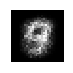

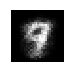

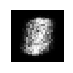

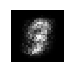

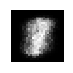

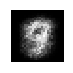

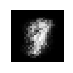

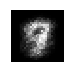

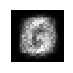

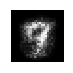

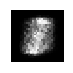

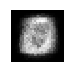

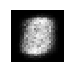

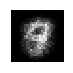

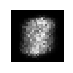

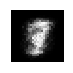

Iter-100; D_loss: -0.006313938647508621; G_loss: -0.004685591906309128


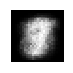

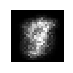

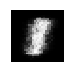

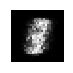

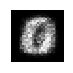

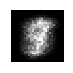

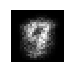

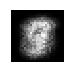

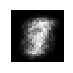

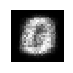

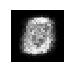

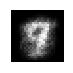

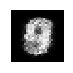

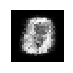

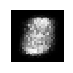

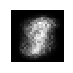

epoch 7
Iter-100; D_loss: -0.008432474918663502; G_loss: 0.001972608733922243


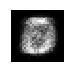

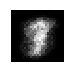

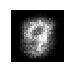

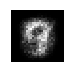

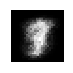

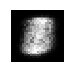

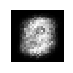

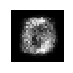

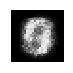

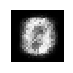

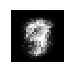

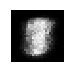

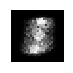

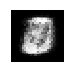

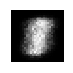

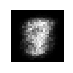

Iter-100; D_loss: -0.010062862187623978; G_loss: -0.024886012077331543


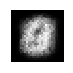

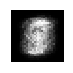

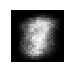

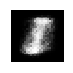

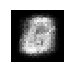

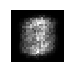

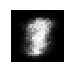

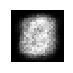

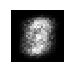

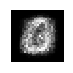

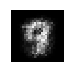

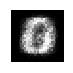

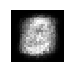

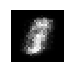

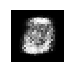

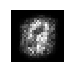

Iter-100; D_loss: -0.012116912752389908; G_loss: -0.020386070013046265


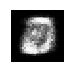

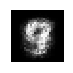

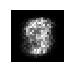

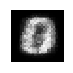

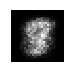

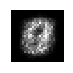

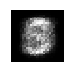

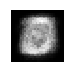

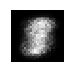

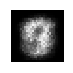

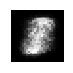

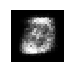

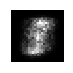

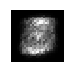

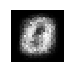

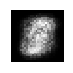

Iter-100; D_loss: -0.016411621123552322; G_loss: -0.0100215133279562


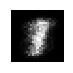

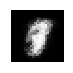

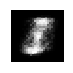

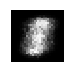

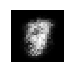

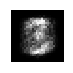

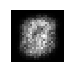

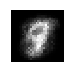

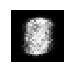

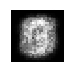

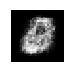

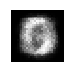

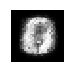

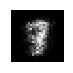

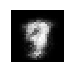

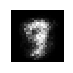

Iter-100; D_loss: -0.016924625262618065; G_loss: -0.006447152700275183


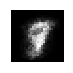

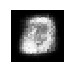

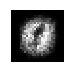

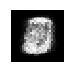

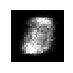

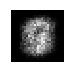

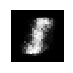

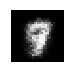

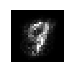

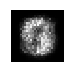

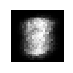

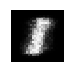

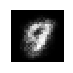

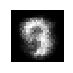

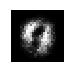

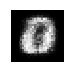

Iter-100; D_loss: -0.015325088053941727; G_loss: 5.670383688993752e-05


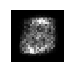

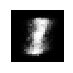

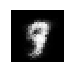

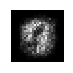

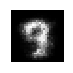

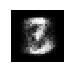

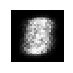

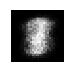

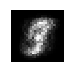

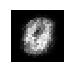

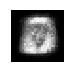

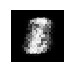

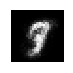

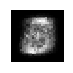

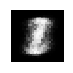

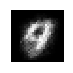

epoch 8
Iter-100; D_loss: -0.014589451253414154; G_loss: -0.01671726256608963


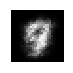

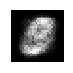

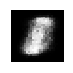

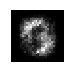

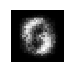

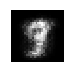

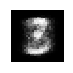

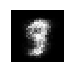

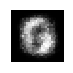

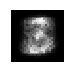

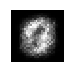

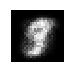

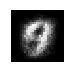

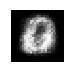

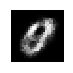

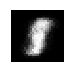

Iter-100; D_loss: -0.013107599690556526; G_loss: -0.004652649164199829


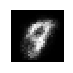

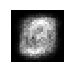

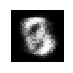

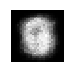

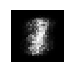

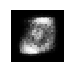

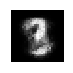

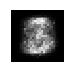

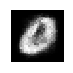

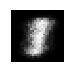

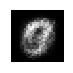

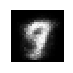

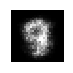

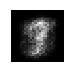

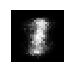

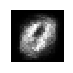

Iter-100; D_loss: -0.01161132287234068; G_loss: -0.008866578340530396


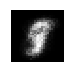

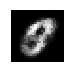

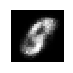

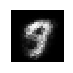

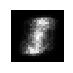

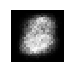

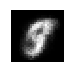

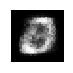

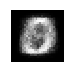

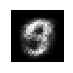

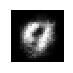

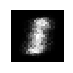

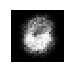

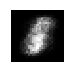

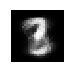

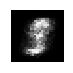

Iter-100; D_loss: -0.01105983555316925; G_loss: -0.046386606991291046


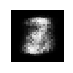

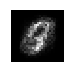

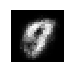

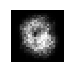

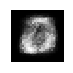

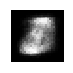

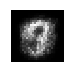

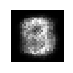

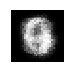

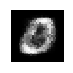

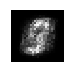

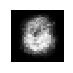

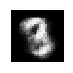

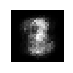

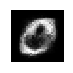

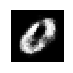

Iter-100; D_loss: -0.011179359629750252; G_loss: -0.027574025094509125


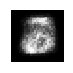

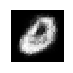

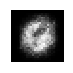

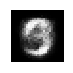

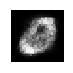

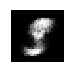

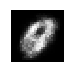

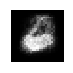

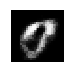

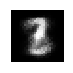

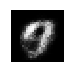

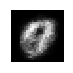

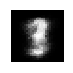

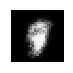

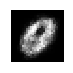

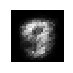

epoch 9
Iter-100; D_loss: -0.013334311544895172; G_loss: -0.014284932985901833


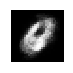

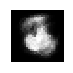

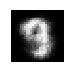

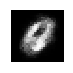

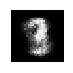

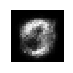

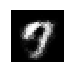

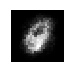

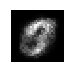

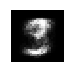

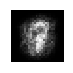

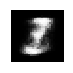

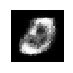

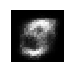

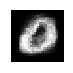

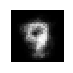

Iter-100; D_loss: -0.013482462614774704; G_loss: -0.027413371950387955


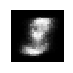

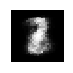

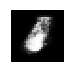

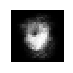

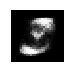

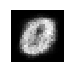

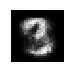

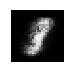

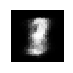

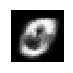

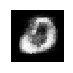

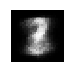

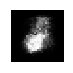

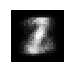

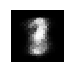

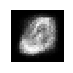

Iter-100; D_loss: -0.014362718909978867; G_loss: -0.01910490170121193


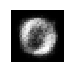

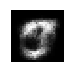

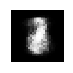

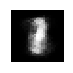

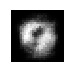

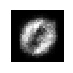

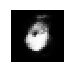

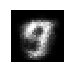

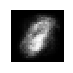

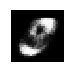

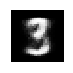

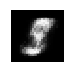

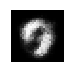

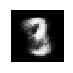

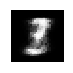

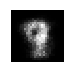

Iter-100; D_loss: -0.011516885831952095; G_loss: -0.0055623166263103485


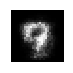

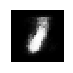

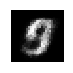

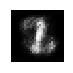

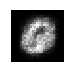

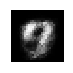

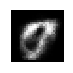

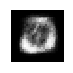

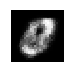

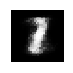

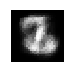

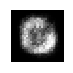

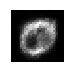

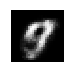

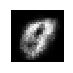

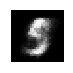

Iter-100; D_loss: -0.009742436930537224; G_loss: -0.026556259021162987


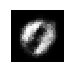

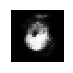

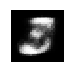

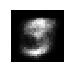

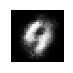

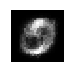

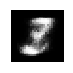

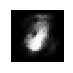

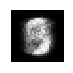

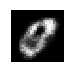

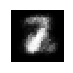

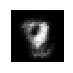

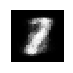

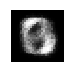

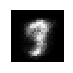

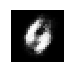

Iter-100; D_loss: -0.01114669069647789; G_loss: -0.023938871920108795


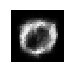

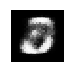

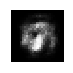

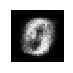

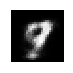

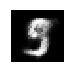

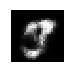

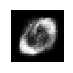

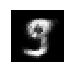

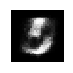

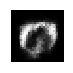

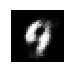

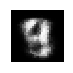

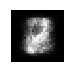

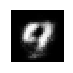

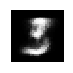

In [128]:
# def train(generative_model, discriminator_model, dataloader, crit, optim):
dataloader = trn_loader
i=0
for epoch in range(10):
    print ('epoch',epoch)
    total_loss = 0
    for inputs, targets in dataloader:
        inputs = Variable(inputs.view(inputs.size(0),-1).cuda())
        targets = Variable(targets.cuda())

        z = torch.randn(inputs.size(0),z_dim).cuda()
        z_noise = Variable(z.cuda())

        G_sample = G(z_noise)
        D_real = D(inputs)
        D_fake = D(G_sample)

        # loss function for discriminator
        D_loss = -(torch.mean(D_real) - torch.mean(D_fake))

        D_solver.zero_grad()
        D_loss.backward()
        D_solver.step()

        # Weight clipping
        for p in D.parameters():
            p.data.clamp_(-0.01, 0.01)

        # Generator forward-loss-backward-update
        G_sample = G(z_noise)
        D_fake = D(G_sample)

        G_loss = -torch.mean(D_fake)

        G_solver.zero_grad()
        G_loss.backward()
        G_solver.step()

        # Housekeeping - reset gradient
        reset_grad()

        total_loss += D_loss.data[0]

    #     return total_loss / len(dataloader)

         # Print and plot every now and then
        if i % 100 == 0:
            print('Iter-{}; D_loss: {}; G_loss: {}'.format(i, D_loss.data[0], G_loss.data[0]))

            samples = G(z_noise).data.cpu().numpy()[:16]

            fig = plt.figure(figsize=(4, 4))
            gs = gridspec.GridSpec(4, 4)
            gs.update(wspace=0.05, hspace=0.05)

            for i, sample in enumerate(samples):
                ax = plt.subplot(gs[i])
                plt.axis('off')
                ax.set_xticklabels([])
                ax.set_yticklabels([])
                ax.set_aspect('equal')
                plt.imshow(sample.reshape(28, 28), cmap='Greys_r')
                plt.show()
        i+=1